1\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn!):

* Fill a numpy array, x,  of len(N) (with N=O(100)) with a variable normally distributed, with a given mean a standard deviation
* Fill an histogram in pyplot taking properly care about the aesthetic
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* for every element of x, create a gaussian with the mean corresponding the element value and std as a parameter that can be tuned. The std default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5.}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with np.sum()) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy.random as npr

import scipy.stats as stats
from scipy.stats import norm

npr.seed(42)

In [7]:

mu,sigma=0 , 0.05
a=npr.normal(mu, sigma, 100)


<>:6: SyntaxWarning: invalid escape sequence '\m'
<>:6: SyntaxWarning: invalid escape sequence '\s'
<>:6: SyntaxWarning: invalid escape sequence '\m'
<>:6: SyntaxWarning: invalid escape sequence '\s'
C:\Users\andre\AppData\Local\Temp\ipykernel_94096\133550183.py:6: SyntaxWarning: invalid escape sequence '\m'
  plt.hist(a, bins=bin,label=f'Normal dist, $\mu={mu}$ and $\sigma={sigma}$',edgecolor='black',color='green', density=False)
C:\Users\andre\AppData\Local\Temp\ipykernel_94096\133550183.py:6: SyntaxWarning: invalid escape sequence '\s'
  plt.hist(a, bins=bin,label=f'Normal dist, $\mu={mu}$ and $\sigma={sigma}$',edgecolor='black',color='green', density=False)


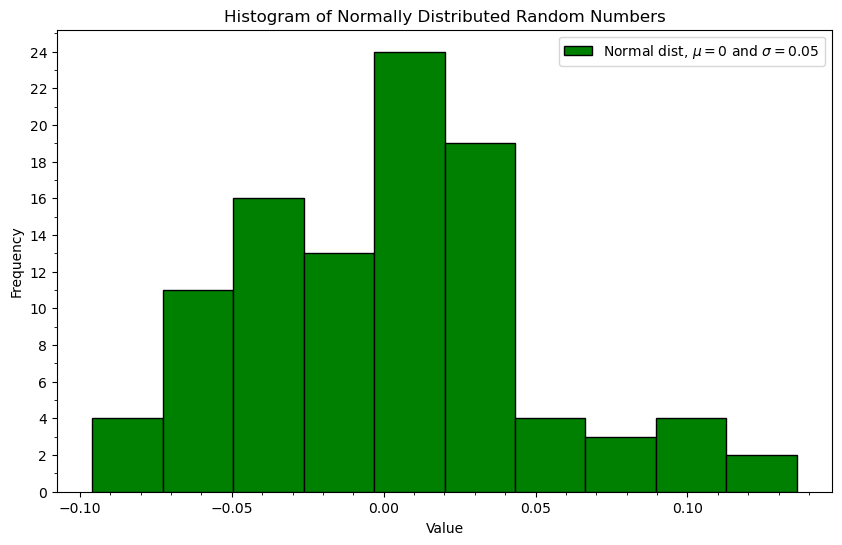

In [15]:
bin=10
from matplotlib.ticker import AutoMinorLocator, MultipleLocator, FuncFormatter,AutoLocator
#Se definen 10 bins debido a la raiz de la cantidad de datos
plt.figure(figsize=(10,6))
ax=plt.subplot()
plt.hist(a, bins=bin,label=f'Normal dist, $\mu={mu}$ and $\sigma={sigma}$',edgecolor='black',color='green', density=False)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.yticks(range(0, 25, 2))
plt.xticks()
plt.title('Histogram of Normally Distributed Random Numbers')

x = np.linspace(a.min(), a.max(), 100)
y = norm.std(mu) 

ax.yaxis.set_minor_locator(AutoMinorLocator(2))
ax.xaxis.set_minor_locator(AutoMinorLocator(5))
#plt.plot(x, y, 'r-', linewidth=2, label='Normal Distribution PDF')
plt.legend()

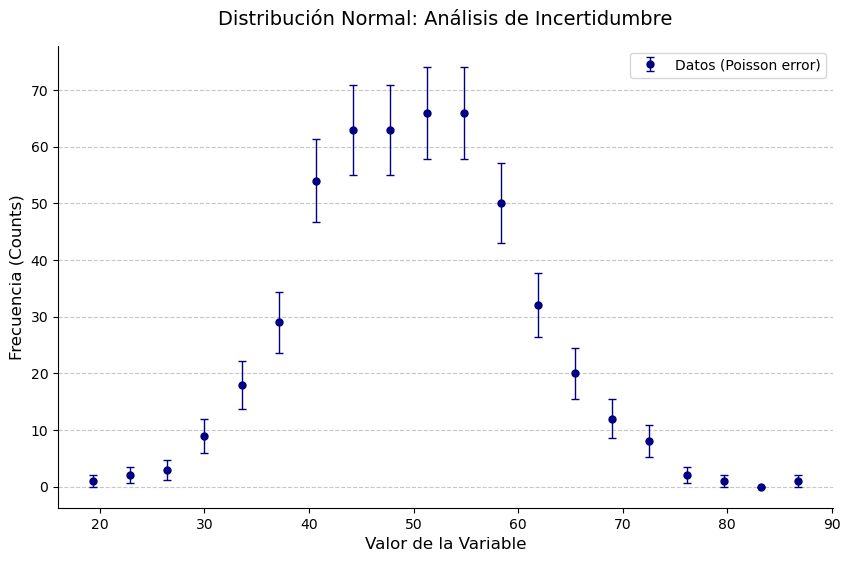

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

# 1. Generación de datos
N = 500  # O(100)
mean = 50
std_dev = 10
x = np.random.normal(loc=mean, scale=std_dev, size=N)

# 2. Cálculo científico de Bins (Regla de Freedman-Diaconis)
# Proporciona el ancho de bin óptimo basado en la dispersión de los datos
q25, q75 = np.percentile(x, [25, 75])
iqr = q75 - q25
bin_width = 2 * iqr / (len(x) ** (1/3))
num_bins = int((x.max() - x.min()) / bin_width)

# 3. Preparación del histograma para puntos de datos
counts, bin_edges = np.histogram(x, bins=num_bins)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

# Error de Poisson (incertidumbre = sqrt(N))
errors = np.sqrt(counts)

# 4. Visualización Estética
fig, ax = plt.subplots(figsize=(10, 6))

# Dibujar como puntos con barras de error (estilo Paper Científico)
ax.errorbar(bin_centers, counts, yerr=errors, fmt='o', color='navy', 
            markersize=5, capsize=3, elinewidth=1, label='Datos (Poisson error)')

# Estética y Etiquetas
ax.set_title('Distribución Normal: Análisis de Incertidumbre', fontsize=14, pad=15)
ax.set_xlabel('Valor de la Variable', fontsize=12)
ax.set_ylabel('Frecuencia (Counts)', fontsize=12)

# Forzar etiquetas de eje Y a solo enteros (Requerimiento técnico)
ax.yaxis.set_major_locator(MaxNLocator(integer=True))

# Mejoras visuales adicionales
ax.grid(axis='y', linestyle='--', alpha=0.7)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.legend()

plt.show()

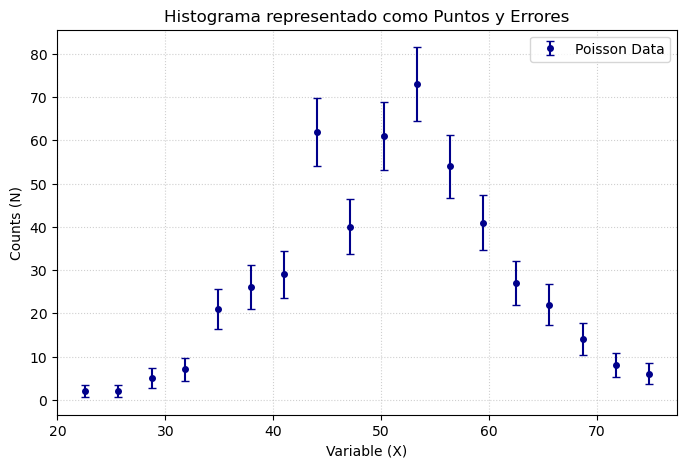

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

# 1. Generación de datos (Ejercicio nuevo)
N = 500
x = np.random.normal(50, 10, N)

# 2. Cálculo del histograma (SIN graficar)
# Usamos 'auto' para que determine los bins de forma científica
counts, bin_edges = np.histogram(x, bins='auto')

# 3. Cálculo de la posición de los puntos (centro de cada barra)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

# 4. Cálculo del error de Poisson
errors = np.sqrt(counts)

# 5. Graficado manual con puntos y barras de error
plt.figure(figsize=(8, 5))

plt.errorbar(bin_centers, counts, yerr=errors, 
             fmt='o',           # 'o' significa puntos redondos
             color='darkblue', 
             markersize=4, 
             capsize=3,         # Pestañas horizontales en las barras de error
             label='Poisson Data')

# Configuración estética profesional
plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True)) # Solo enteros en Y
plt.xlabel('Variable (X)')
plt.ylabel('Counts (N)')
plt.title('Histograma representado como Puntos y Errores')
plt.grid(True, linestyle=':', alpha=0.6)
plt.legend()

plt.show()

2\. **Color-coded scatter plot**

Produce a scatter plot out of a dataset with two categories

* Write a function that generate a 2D datasets of 2 categories. Each category should distribute as a 2D gaussian with a given mean and std (clearly it is better to have different values means..)
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below

You can try to make the procedure more general by allowing a given number $n\ge 2$ of categories

--2020-11-17 14:38:20--  https://www.dropbox.com/s/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
Risoluzione di www.dropbox.com (www.dropbox.com)... 162.125.69.1
Connessione a www.dropbox.com (www.dropbox.com)|162.125.69.1|:443... connesso.
Richiesta HTTP inviata, in attesa di risposta... 301 Moved Permanently
Posizione: /s/raw/u4y3k4kk5tc7j46/two_categories_scatter_plot.png [segue]
--2020-11-17 14:38:20--  https://www.dropbox.com/s/raw/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
Riutilizzo della connessione esistente a www.dropbox.com:443.
Richiesta HTTP inviata, in attesa di risposta... 302 Found
Posizione: https://ucf08e6905d1af2d3896db082fc4.dl.dropboxusercontent.com/cd/0/inline/BDXix2_dqdgaay0CqpUasoeq-d7qojUHdcsmMO4LSt4qx-6aIfFdyTse5ykuTp1AKTZzWHqB83UcrULRU6e9PqpgyW2Ud6gq_BVV1oIDp8Jfng/file# [segue]
--2020-11-17 14:38:21--  https://ucf08e6905d1af2d3896db082fc4.dl.dropboxusercontent.com/cd/0/inline/BDXix2_dqdgaay0CqpUasoeq-d7qojUHdcsmMO4LSt4qx-6aIfFdyTse5ykuTp1AKTZzWHqB83Ucr

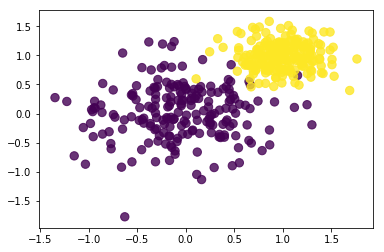

In [18]:
! wget https://www.dropbox.com/s/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
from IPython.display import Image
Image('two_categories_scatter_plot.png')

3\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following dataset and load it as a pandas dataframe:
```bash
wget https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy
```
Note that you should use the `np.load()` function to load the file as a numpy array, call the `.item()` method, and then pass it to the `pd.DataFrame()` constructor.
* Inspect the dataset, you'll find two variables (features)
* Clean the sample by selecting the entries (rows) with the variable "residual" in absolute value smaller than 2
* perform a linear regression of "residuals" versus "distances" using `scipy.stats.linregress()` 
* plot a seaborn jointplot of  "residuals" versus "distances", having seaborn performing a linear regression. The result of the regression should be displayed on the plot
* Fill 3 numpy arrays
  * x, serving as an array of bin centers for the "distance" variable. It should range from 0 to 20 with reasonable number of steps (bins)
  * y, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * erry, the standard deviation of the  of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot